# **LGM - VIP Data Science Internship Programme**

## **Beginner Level -> Task #3**
### **Music Recommendation**

In [56]:
# Importing necessary libraries for our task.

import time
import numpy as np # For Array Operations
import pandas as pd # For Statistical Calculations
import matplotlib.pyplot as plt # For interpreting data in graphs
import seaborn as sb # For interpreting data in graphs
import missingno as msno
import gc
import lightgbm as lgb
from xgboost import XGBClassifier

**Store Training, Testing datasets**

In [59]:
data_path = './kkbox-music-recommendation-challenge'
train = pd.read_csv(data_path + '/train.csv')
test = pd.read_csv(data_path + '/test.csv')
songs = pd.read_csv(data_path + '/songs.csv')
members = pd.read_csv(data_path + '/members.csv')
song_extra_info = pd.read_csv(data_path + '/song_extra_info.csv')

In [8]:
print('Shape of train file is :', train.shape)
print('Shape of test file is :', test.shape)
print('Shape of songs file is :', songs.shape)
print('Shape of members file is :', members.shape)
print('Shape of songs_extra_info file is :', song_extra_info.shape)

Shape of train file is : (7377418, 6)
Shape of test file is : (2556790, 6)
Shape of songs file is : (2296320, 7)
Shape of members file is : (34403, 7)
Shape of songs_extra_info file is : (2295971, 3)


In [9]:
print('Attributes of train : ', train.columns)
print('Attributes of test :', test.columns)
print('Attributes of songs : ', songs.columns)
print('Attributes of members : ', members.columns)
print('Attributes of songs_extra_info : ', song_extra_info.columns)

Attributes of train :  Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')
Attributes of test : Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type'],
      dtype='object')
Attributes of songs :  Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')
Attributes of members :  Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')
Attributes of songs_extra_info :  Index(['song_id', 'name', 'isrc'], dtype='object')


### **Training Data Analysis**

In [10]:
train.info() # Information about Train data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [16]:
# Function to plot histograms with respect to argument type (category/target)

def count_plot(data, x, hue, type):
  plt.figure(figsize = (18, 15))
  sb.set(font_scale = 2)
  sb.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.tight_layout()

In [17]:
# Function to plot histograms for categories

def count_plot_function(data, x):
  plt.figure(figsize = (18, 15))
  sb.set(font_scale = 2)
  sb.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

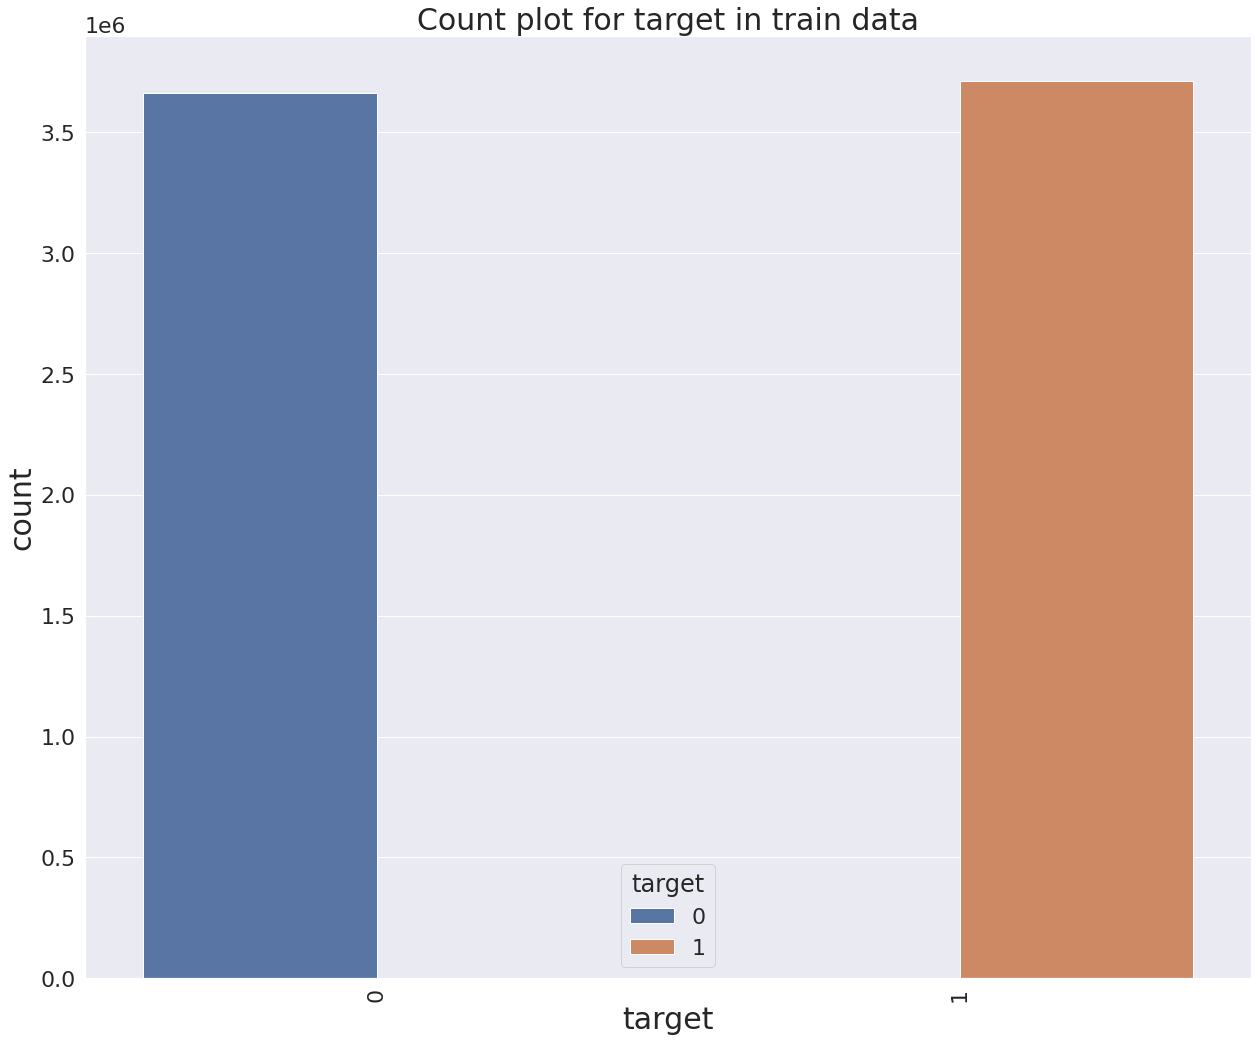

In [18]:
count_plot(train, 'target', 'target', 'train')

In [19]:
print('Data for label 1 : {:.4f}%'.format(train['target'].value_counts()[0]/train.shape[0] * 100))
print('Data for label 0 : {:.4f}%'.format(train['target'].value_counts()[1]/train.shape[0] * 100))

Data for label 1 : 49.6483%
Data for label 0 : 50.3517%


**Clearly, the data is well balanced.** </br>
**Label-1 is 49.6% and Label-0 is 50.4%**

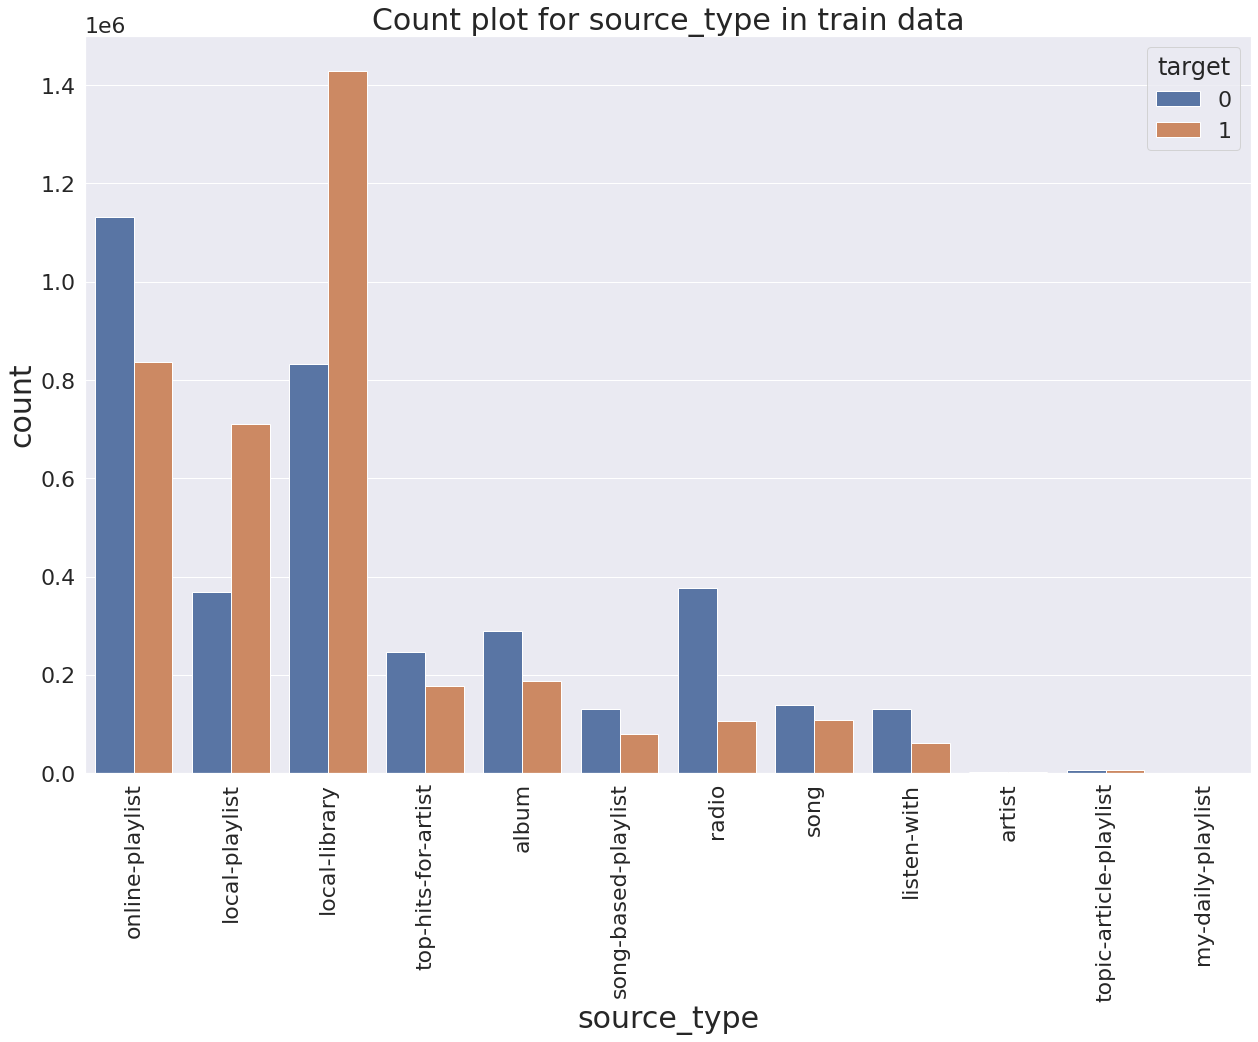

In [20]:
count_plot(train, 'source_type', 'target', 'train')

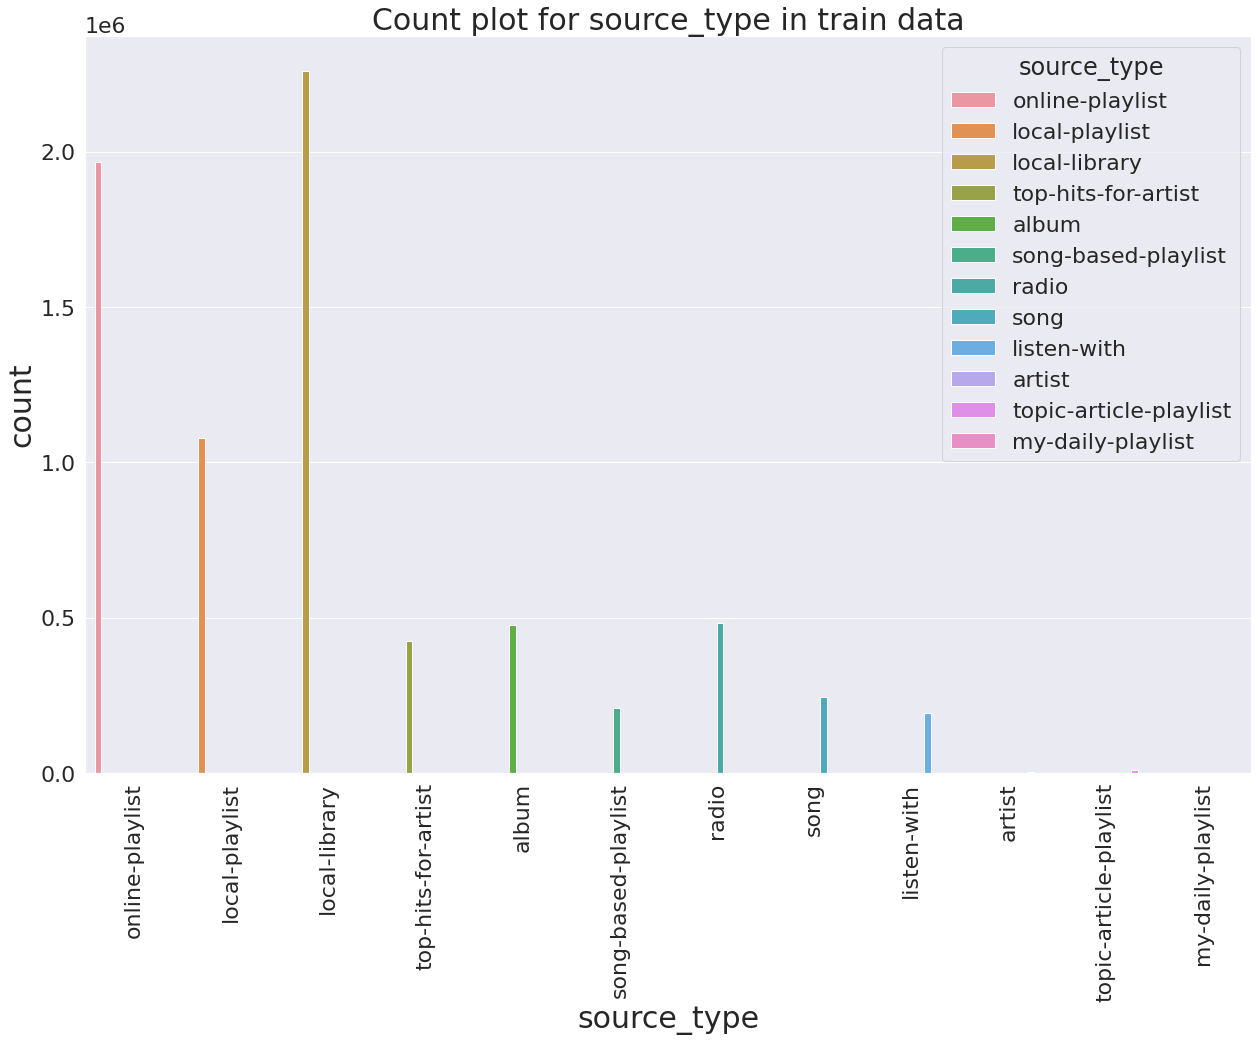

In [21]:
count_plot(train, 'source_type', 'source_type', 'train')

- source_system_tab indicates the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions.
- It can be depicted from the above plot that people repeat songs from their library or discover tabs.
- From notifications or settings tab people are not interested to repeat songs.

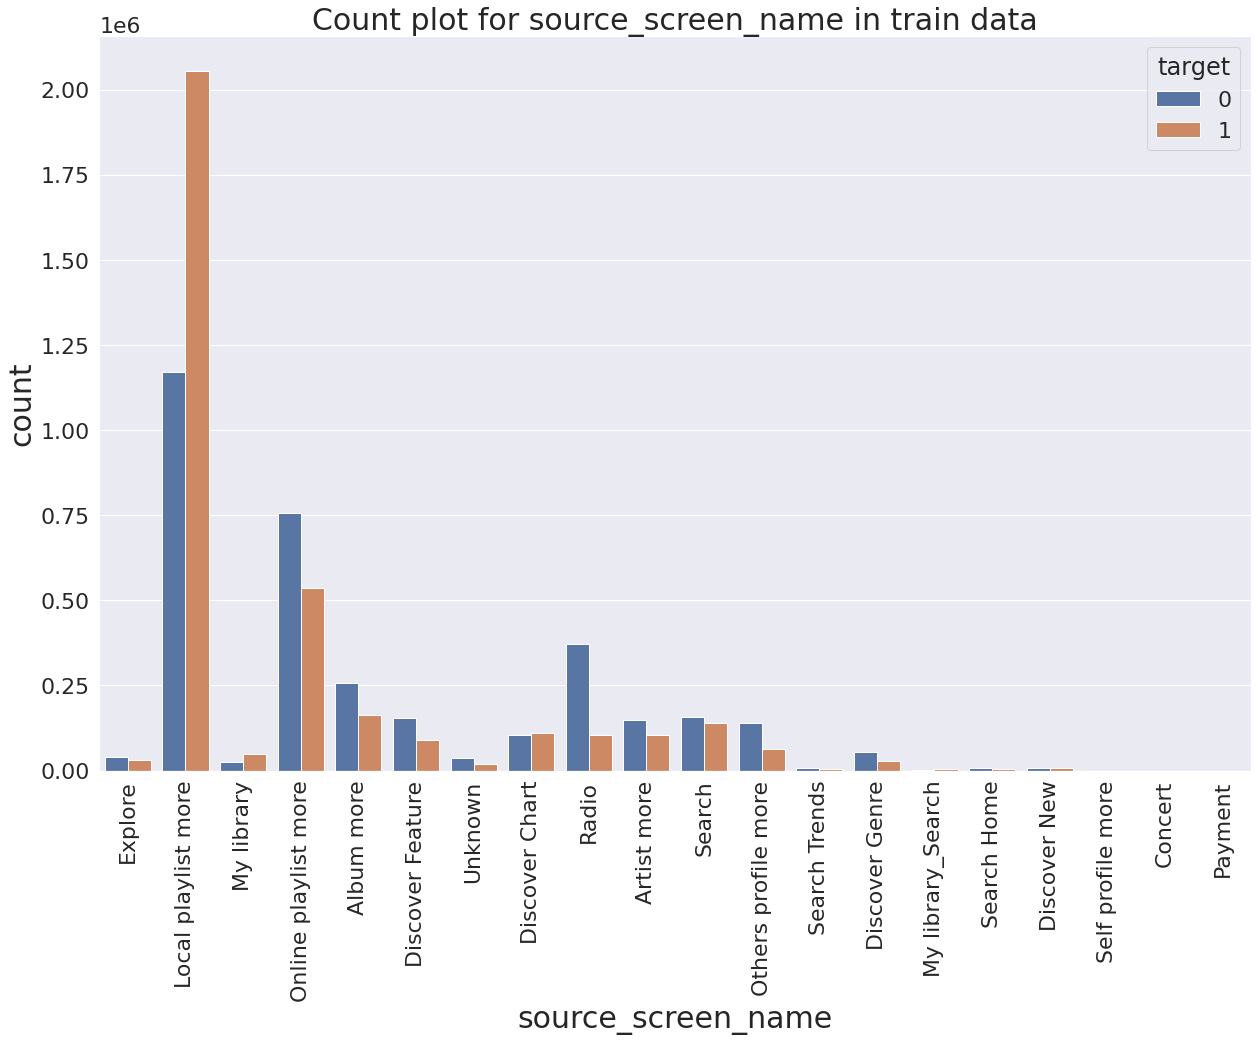

In [22]:
count_plot(train, 'source_screen_name', 'target', 'train')

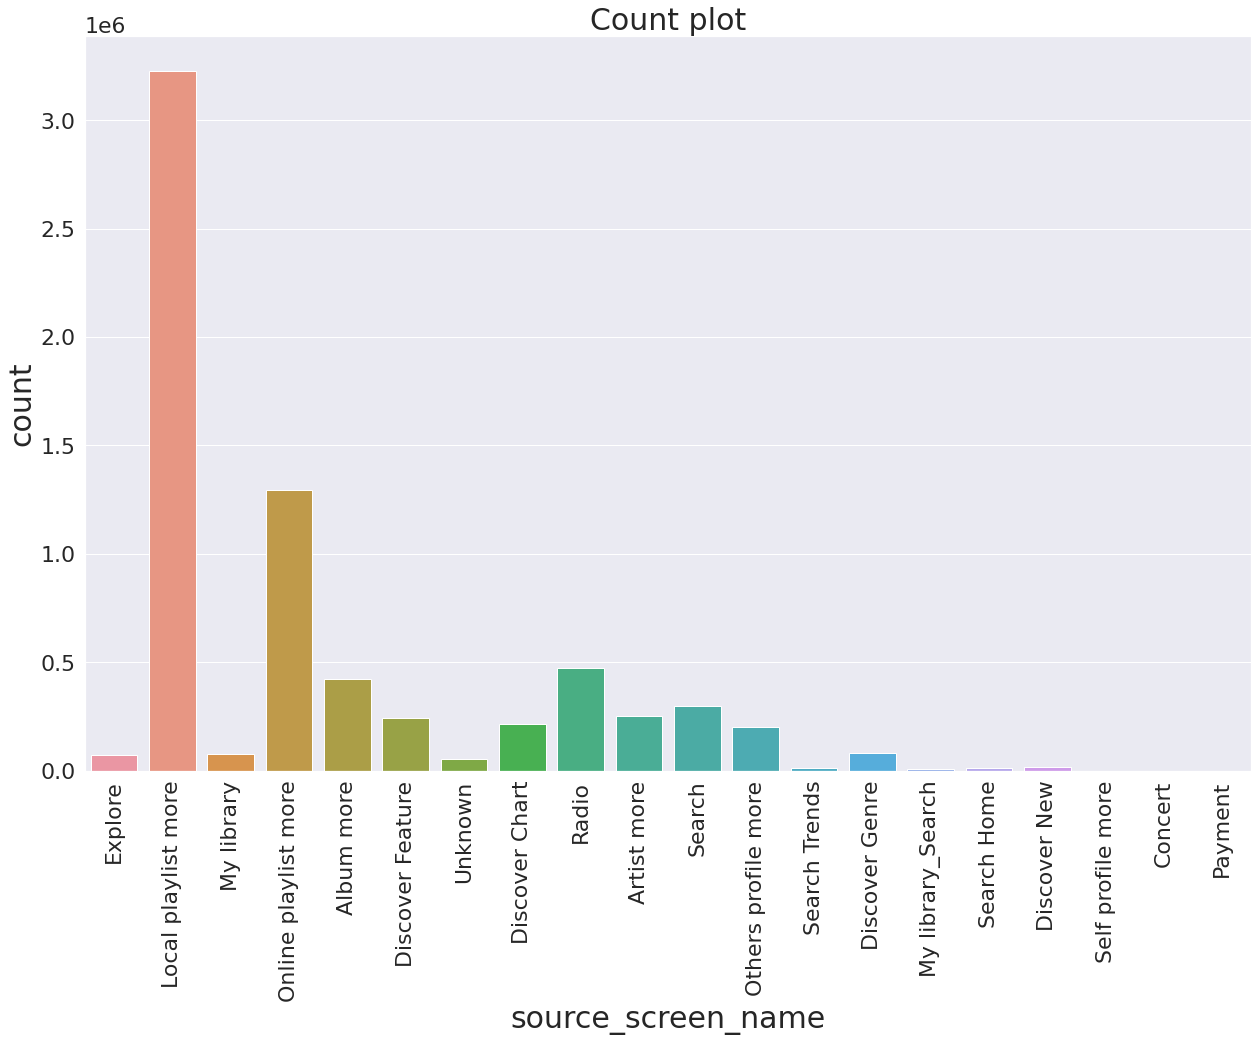

In [23]:
count_plot_function(train, 'source_screen_name')

- source_screen_name is the name of the layout a user sees.
- Most of the users prefer local_playlist or online_playlist_more as their favourite layouts.

### Members Data Analysis

In [24]:
# Function to plot histograms for categories

def count_plot_function(data, x):
  plt.figure(figsize=(18, 15))
  sb.set(font_scale = 2)
  sb.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count',fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

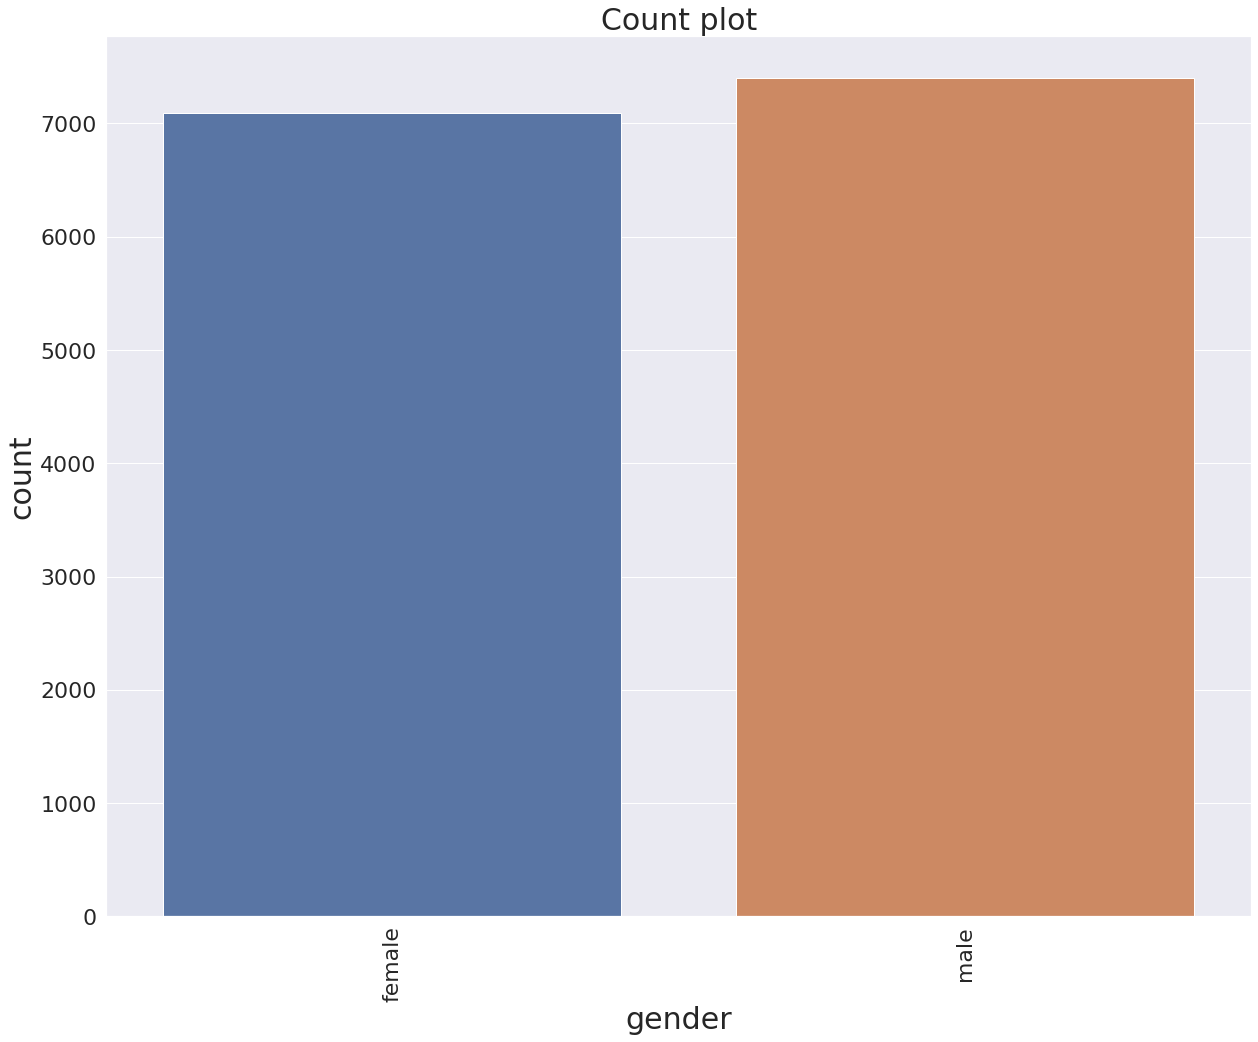

In [25]:
count_plot_function(members, 'gender')

- Both male and female users prefer to listen songs equally.

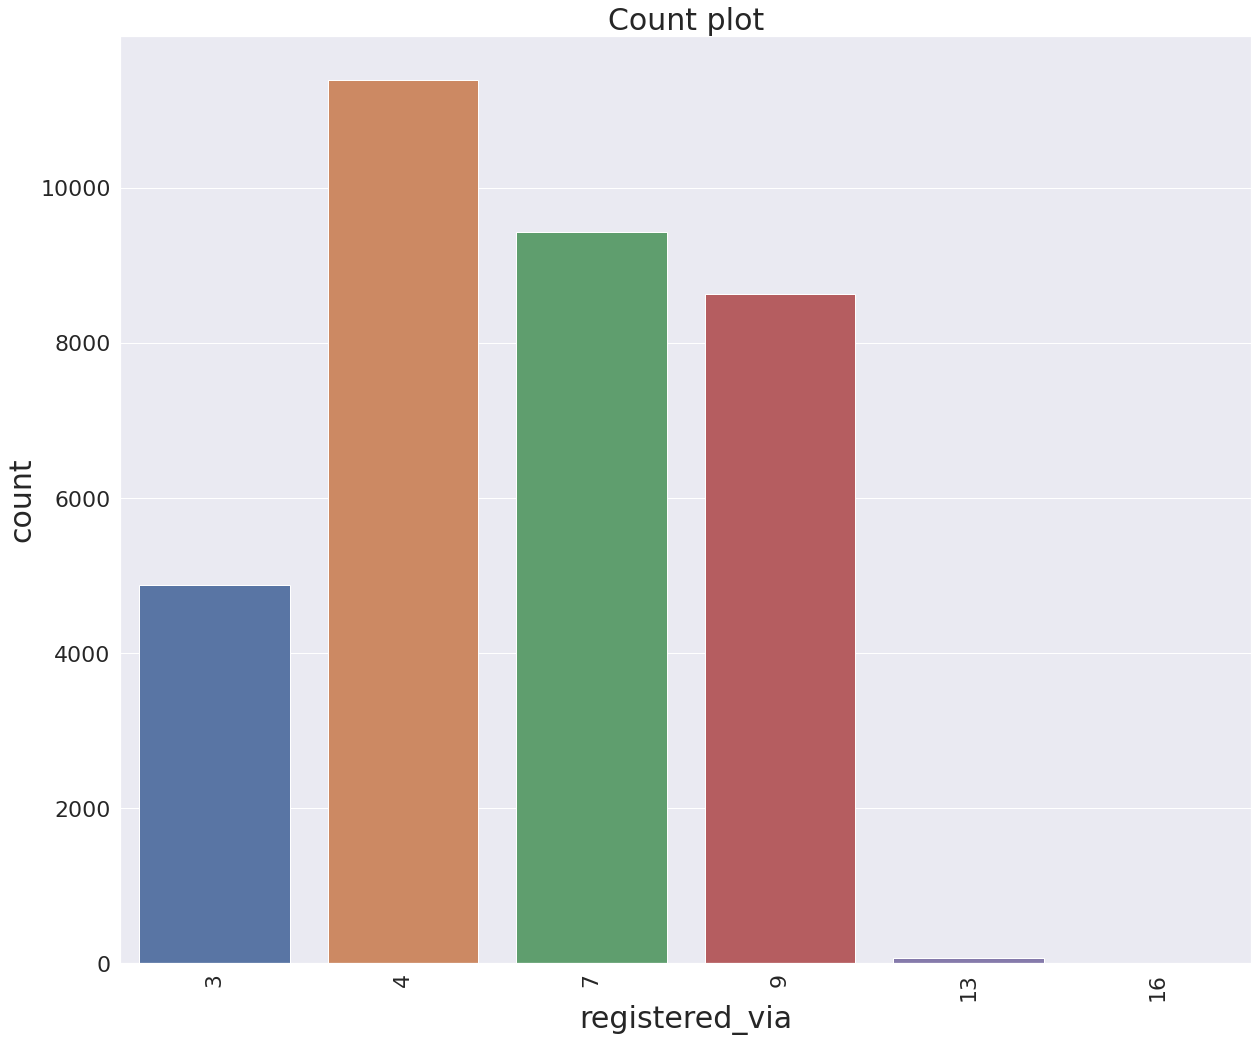

In [26]:
count_plot_function(members, 'registered_via')

- Most of the registrations happened via method '4', '7' and '9'.
- Few uses have registered theirselves via '13' and '16' methods.

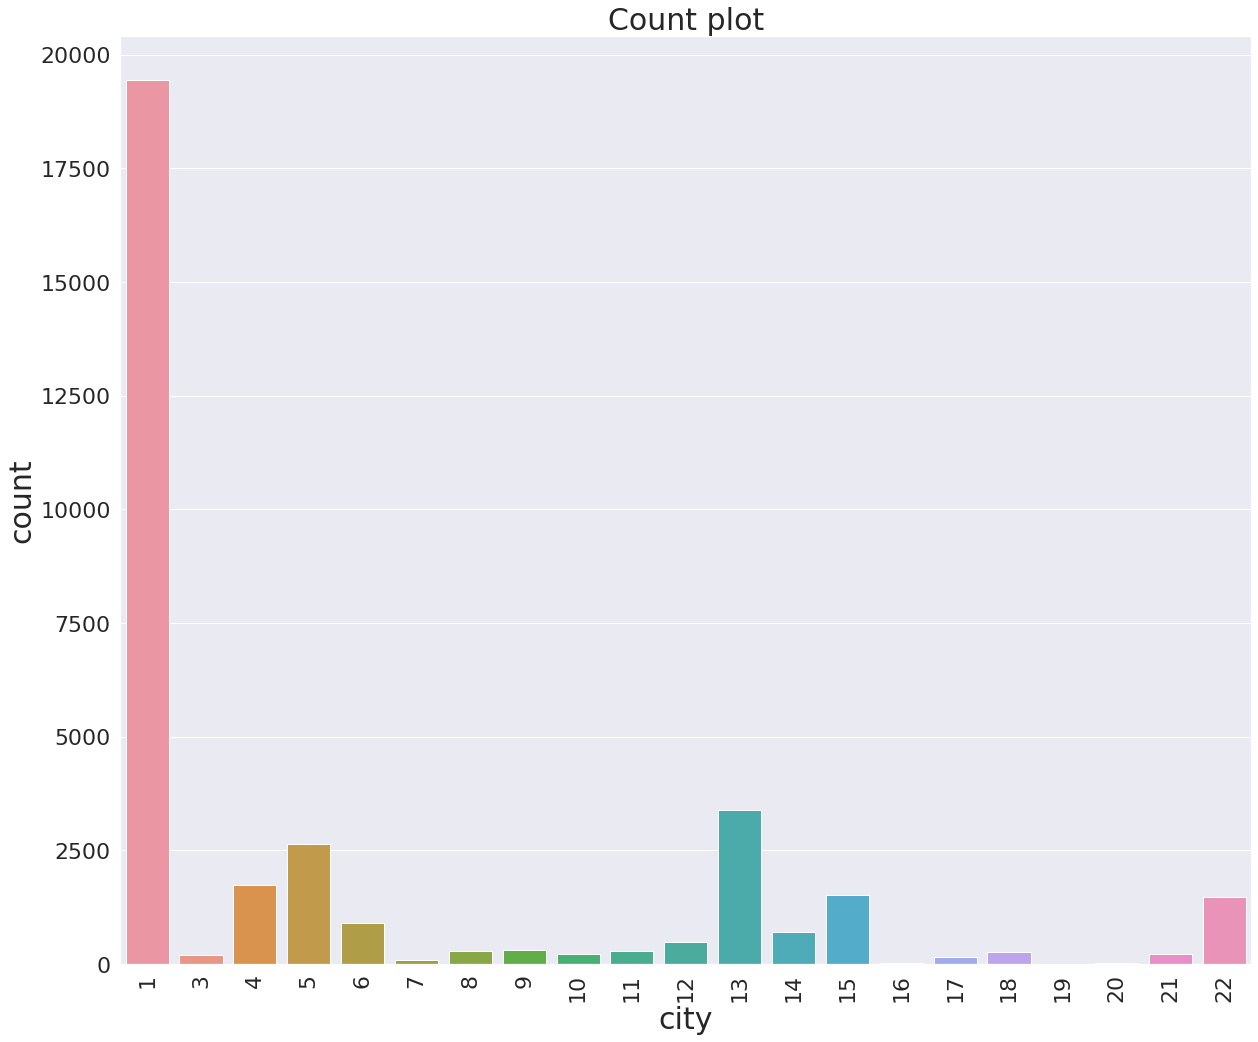

In [27]:
count_plot_function(members, 'city')

- Most of the people who used to listen songs are from '1'- labelled city.
- Some cities have very few people who prefer listening music via this music app.

/home/ritz/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for Registration')

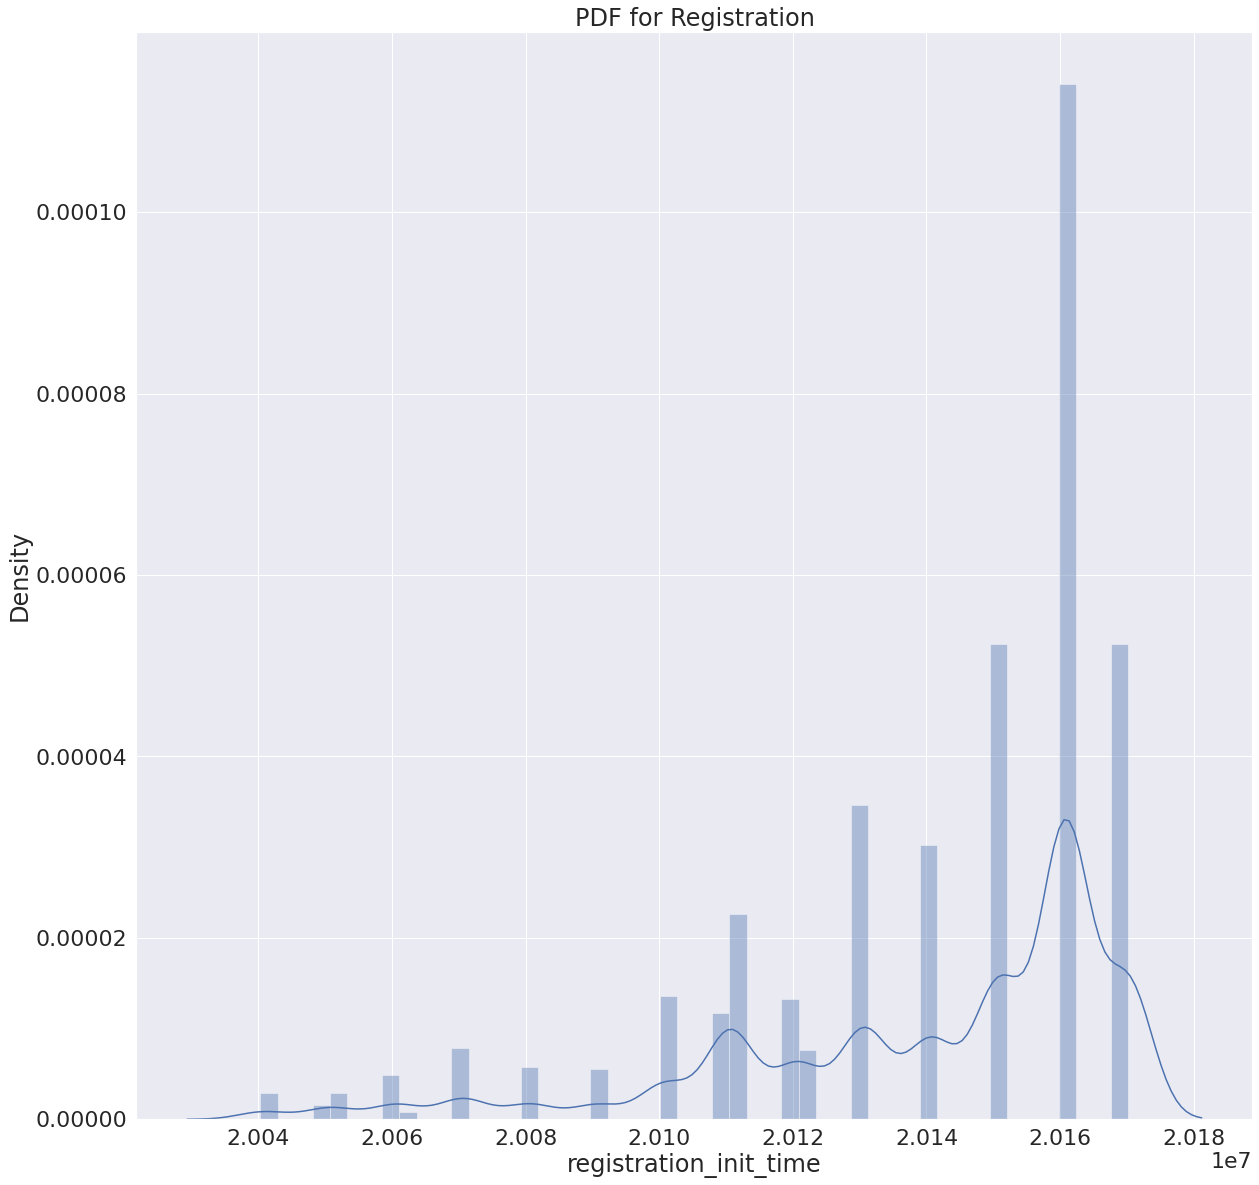

In [28]:
plt.figure(figsize = (20, 20)) 
sb.distplot(members.registration_init_time)
sb.set(font_scale = 2)
plt.title('PDF for Registration')

- We can see that initially people were not fond of listening music but after certain amount time people started to listen music and registered themselves to this music app.

/home/ritz/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for Registration')

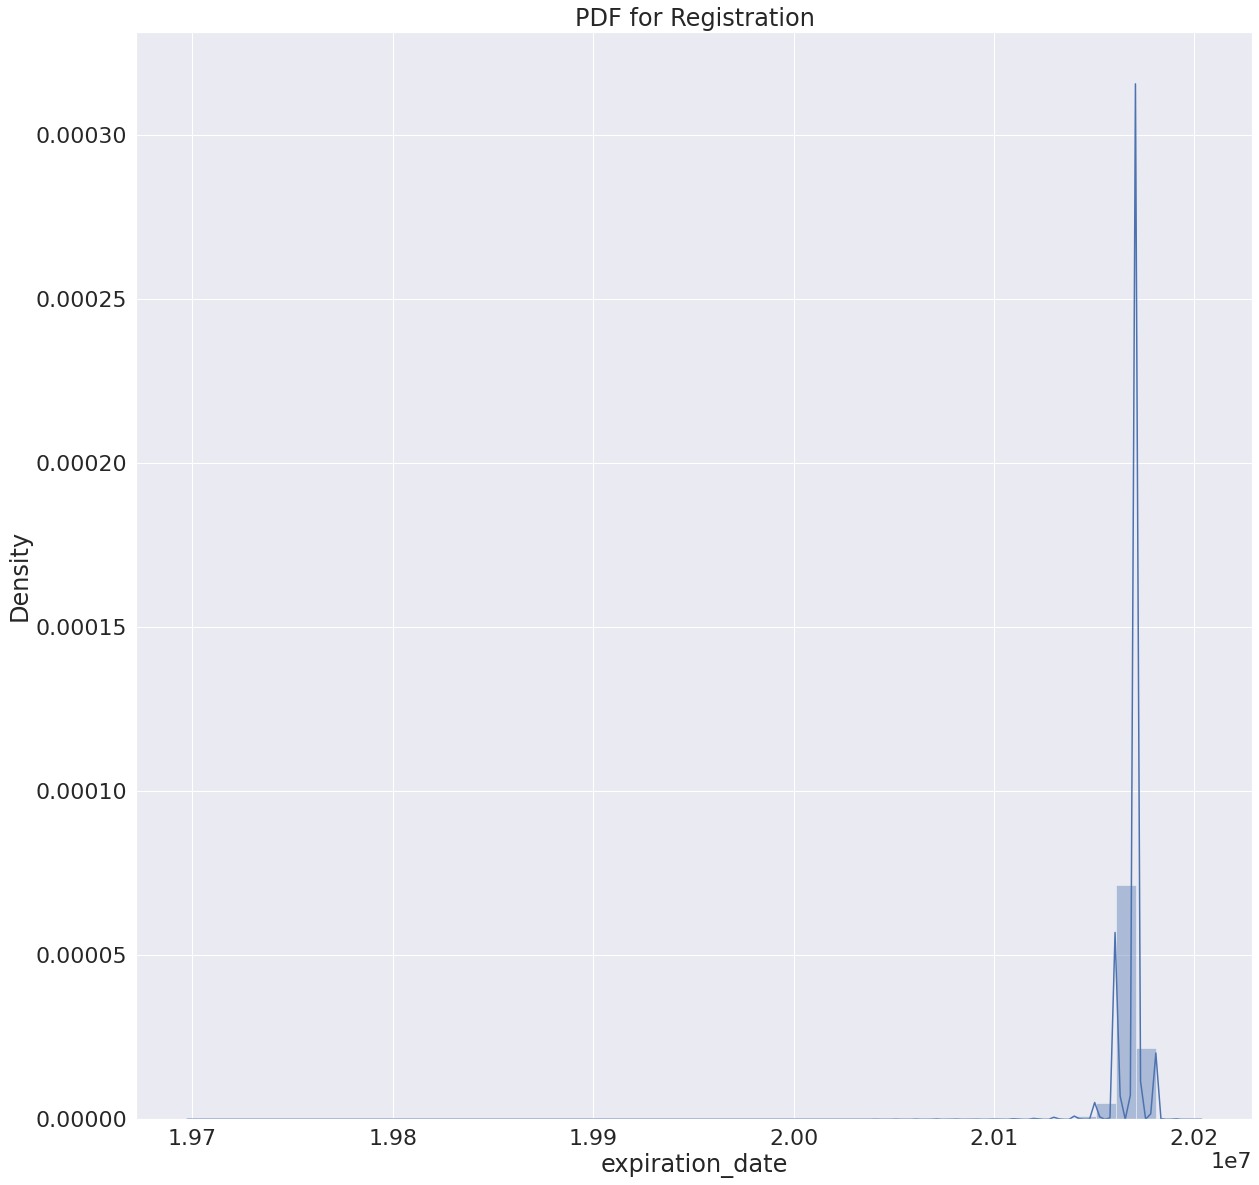

In [29]:
plt.figure(figsize = (20, 20)) 
sb.distplot(members['expiration_date'])
sb.set(font_scale = 2)
plt.title('PDF for Registration')

- We have seen that after certain time people start registering themselves for the music app, their expiration period also starts increasing after certain time period.

In [30]:
members.bd.unique()

array([   0,   43,   28,   33,   20,   30,   29,   26,   25,   21,   22,
         16,   23,   37,   18,   19,   51,   24,   17,   45,   36,   57,
         27,   34,   32,   15,   48,   50,   54,   47,   35,   46,   31,
         14,   41,   59,    2,   40,   38,   55,   39,   73,   49,   44,
        103,   52,   70,   42,   65,   56,  101,   58,   53,   64,   63,
         76,   66,   97,    3,   72,   67,   62,   61,  105,   60,   13,
         90,   12,   68,  131,   74,   89,  931,  -38,  144,   85,  112,
         96,   11,  102,   83, 1051,   87,    7,   95,  -43,  111,   93,
          5,   78, 1030,  106,  107,   82,   10])

In [33]:
# Function to plot PDF and CDf.

def plot_pdf_cdf(x, flag):
  plt.figure(figsize = (15, 10)) 
  kwargs = {'cumulative': True}
  if flag:
    sb.distplot(x, hist_kws = kwargs, kde_kws = kwargs)
    plt.title('CDF for age')
  else:
    sb.distplot(x)
    plt.title('PDF for age')
  sb.set(font_scale=2)

/home/ritz/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


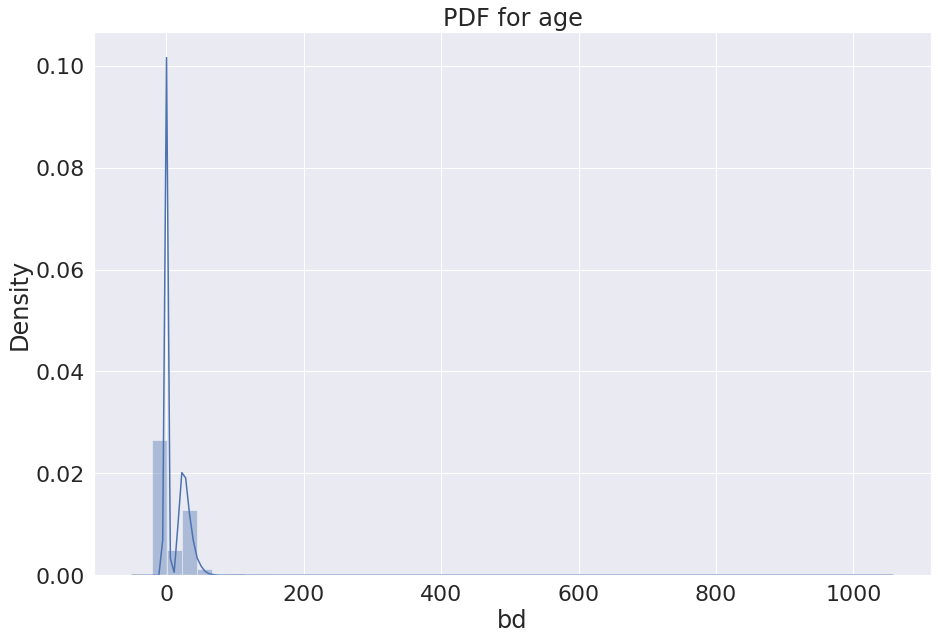

In [34]:
plot_pdf_cdf(members['bd'], False)

/home/ritz/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


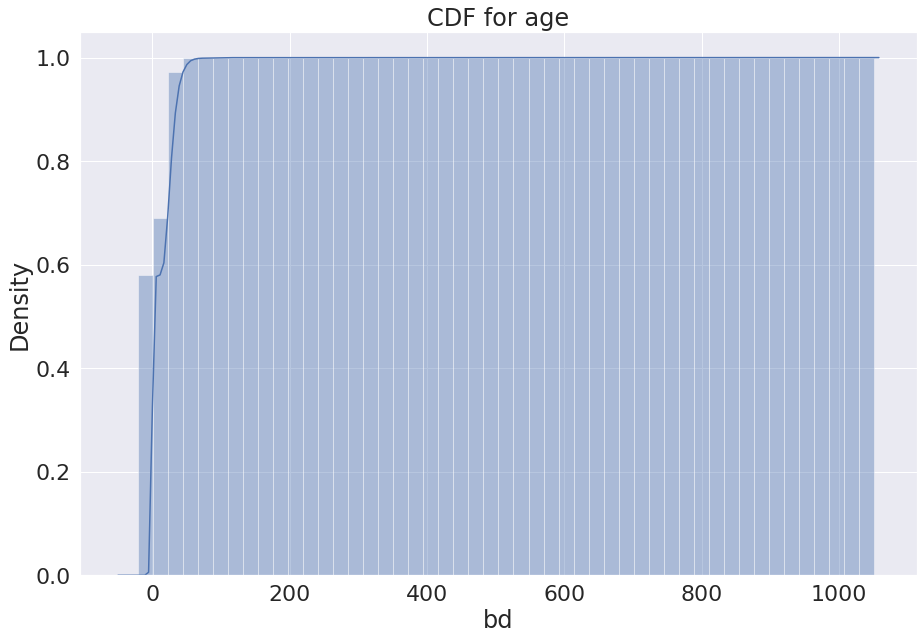

In [35]:
plot_pdf_cdf(members['bd'], True)

In [36]:
np.percentile(members['bd'].values, 98)

47.0

- 98th percentile user is of 47 age.
- Means most of the user are below 50.
- We can also observe via above CDF that almost 99% values are below 50.
- There are also some outliers like 1030, -38, -43, 1051, etc. As age cannot be negative value or more than 1000 for humans.

### Songs Data Analysis

- We have two files which contains information about songs so let's merge two files: songs and song_extra_info on 'song_id' and analyze features in details.

In [37]:
songs_all_info = songs.merge(song_extra_info, on='song_id')

In [38]:
def isrc_to_year(isrc):
  if type(isrc) == str:
    if int(isrc[5:7]) > 17:
      return 1900 + int(isrc[5:7])
    else:
      return 2000 + int(isrc[5:7])
  else:
    return np.nan

songs_all_info['song_year'] = songs_all_info['isrc'].apply(isrc_to_year)

In [39]:
songs_all_info['language'].unique()

array([ 3., 31., 52., 17., 10., -1., 24., 59., 45., 38., nan])

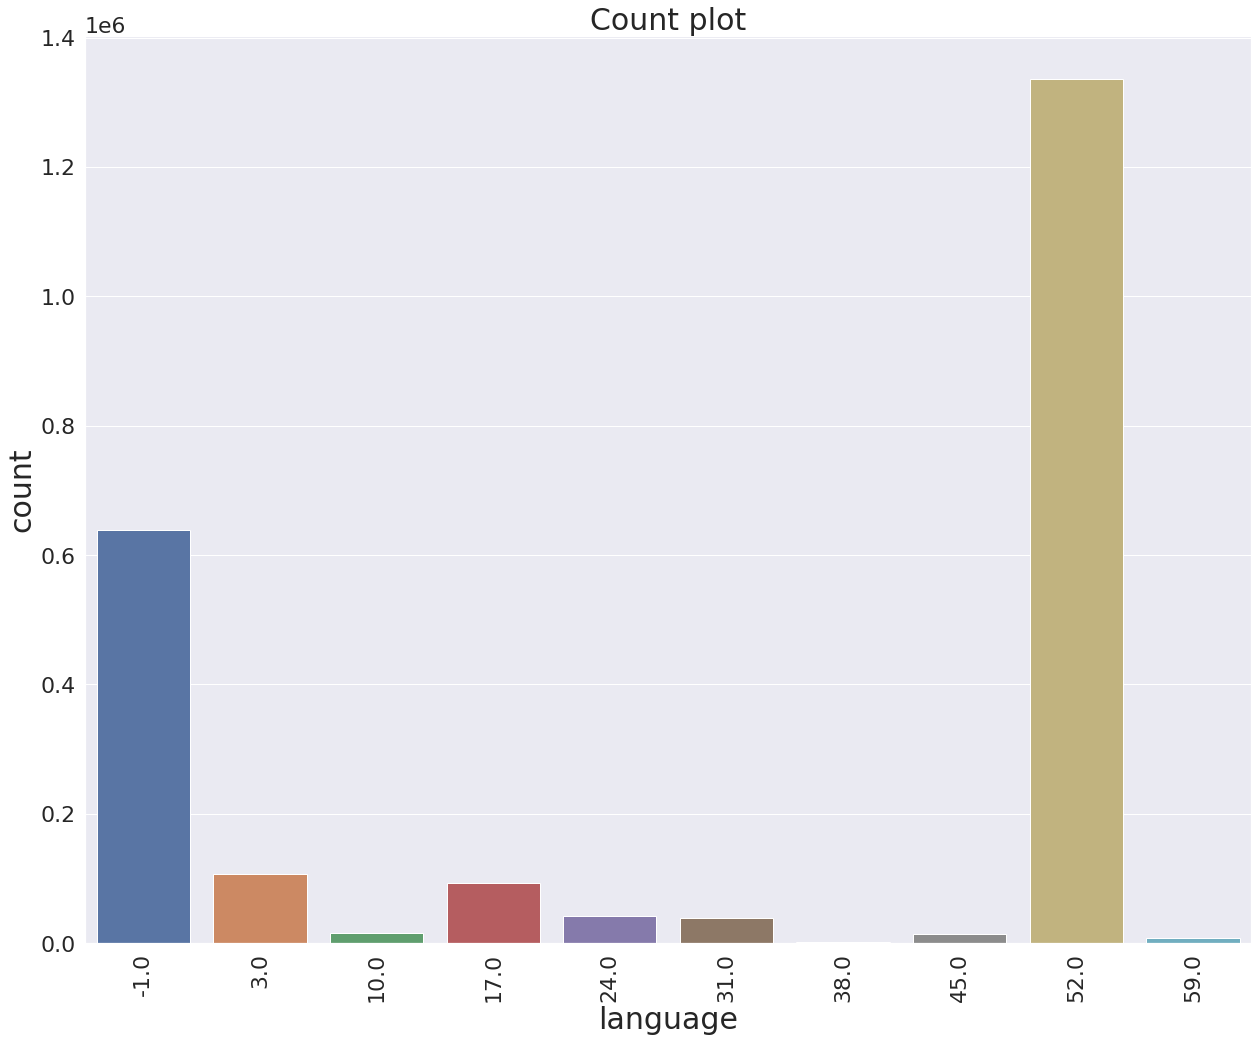

In [40]:
count_plot_function(songs_all_info, 'language')

- Users prefer to listen songs from '52' and '-1' language.

### Merging of data and analysis

#### Missing values

- We will check % of missing values in each column of dataframe.

In [42]:
# Function to check for missing values in dataframe.

def check_missing_values(df):
  
  for col in df.columns:
    nan_count = df[col].isnull().sum()
    total = df.shape[0]
    percentage = nan_count/total * 100
    print(col, 'has {:.2f}% missing values'.format(percentage))

In [43]:
print('Missing values analysis for train data')
check_missing_values(train)

Missing values analysis for train data
msno has 0.00% missing values
song_id has 0.00% missing values
source_system_tab has 0.34% missing values
source_screen_name has 5.62% missing values
source_type has 0.29% missing values
target has 0.00% missing values


In [44]:
print('Missing values analysis for memebrs data')
check_missing_values(members)

Missing values analysis for memebrs data
msno has 0.00% missing values
city has 0.00% missing values
bd has 0.00% missing values
gender has 57.85% missing values
registered_via has 0.00% missing values
registration_init_time has 0.00% missing values
expiration_date has 0.00% missing values


In [45]:
print('Missing values analysis for songs data')
check_missing_values(songs)

Missing values analysis for songs data
song_id has 0.00% missing values
song_length has 0.00% missing values
genre_ids has 4.10% missing values
artist_name has 0.00% missing values
composer has 46.66% missing values
lyricist has 84.71% missing values
language has 0.00% missing values


In [46]:
print('Missing values analysis for songs_all_info data')
check_missing_values(songs_all_info)

Missing values analysis for songs_all_info data
song_id has 0.00% missing values
song_length has 0.00% missing values
genre_ids has 4.10% missing values
artist_name has 0.00% missing values
composer has 46.66% missing values
lyricist has 84.71% missing values
language has 0.00% missing values
name has 0.00% missing values
isrc has 5.95% missing values
song_year has 5.95% missing values


- We can see that train data has over all missing values below 6%.
- In members data 'gender' feature has 57.85% missing values.
- Songs has 'composer' and 'lyricist' features which contains 47% and 85% missing values respectively.

In [47]:
train_members = pd.merge(train, members, on='msno', how='left')
train_merged = pd.merge(train_members, songs_all_info, on='song_id', how='left')

In [48]:
test_members = pd.merge(test, members, on='msno', how='left')
test_merged = pd.merge(test_members, songs_all_info, on='song_id', how='left')

In [49]:
del train_members
del test_members

In [50]:
check_missing_values(train_merged)

msno has 0.00% missing values
song_id has 0.00% missing values
source_system_tab has 0.34% missing values
source_screen_name has 5.62% missing values
source_type has 0.29% missing values
target has 0.00% missing values
city has 0.00% missing values
bd has 0.00% missing values
gender has 40.14% missing values
registered_via has 0.00% missing values
registration_init_time has 0.00% missing values
expiration_date has 0.00% missing values
song_length has 0.02% missing values
genre_ids has 1.63% missing values
artist_name has 0.02% missing values
composer has 22.73% missing values
lyricist has 43.10% missing values
language has 0.02% missing values
name has 0.02% missing values
isrc has 7.83% missing values
song_year has 7.83% missing values


- After merging we can say that, 'gender' feature has 40%, 'composer' has 23% and 'lyricist' has 43% missing values.
- Other fetaures are having less than 8% missing values.

<AxesSubplot:>

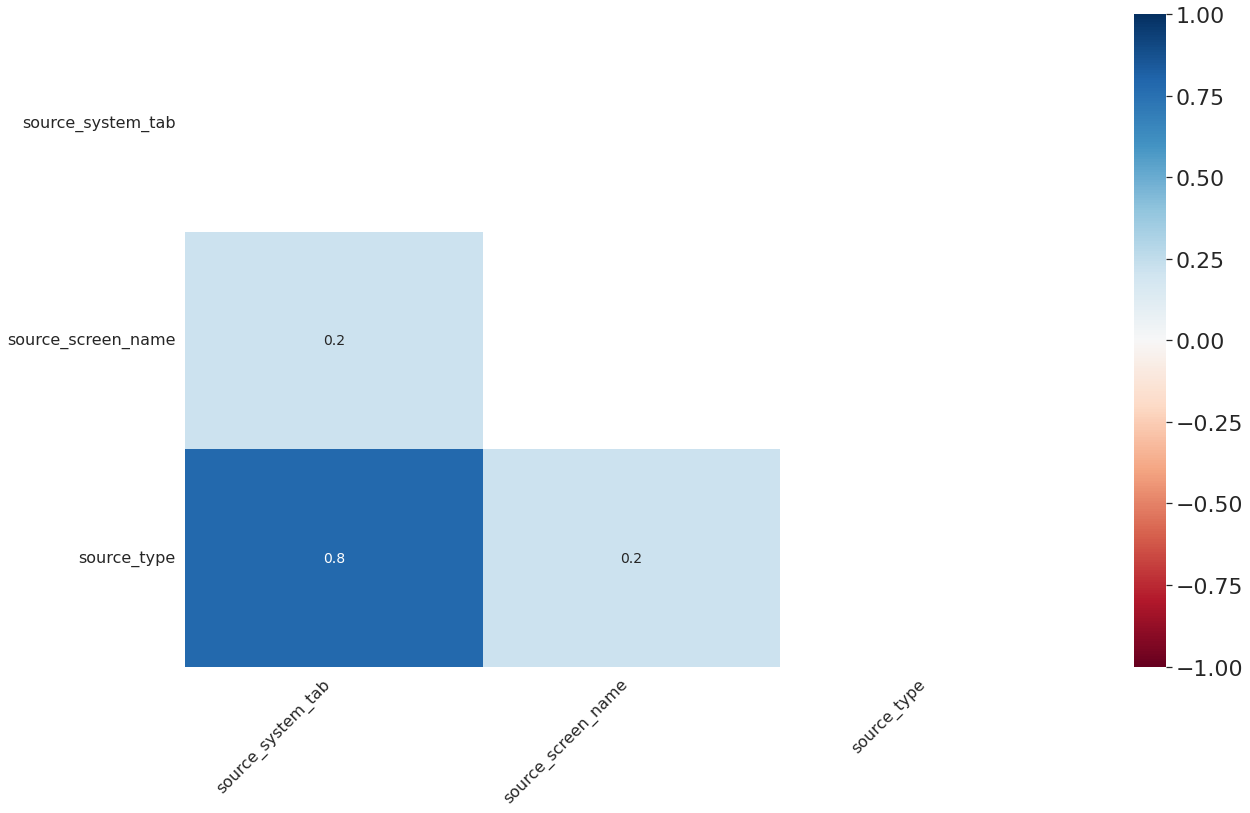

In [51]:
msno.heatmap(train)

- From the above heatmap we can say that no missing values in msno, song_id or target.
- source_type and source_system_tab are having positive strongly corelation.
- In simple lanugauge from the point, where  user starts to play the songs and over some tabs it repats the song.

<AxesSubplot:>

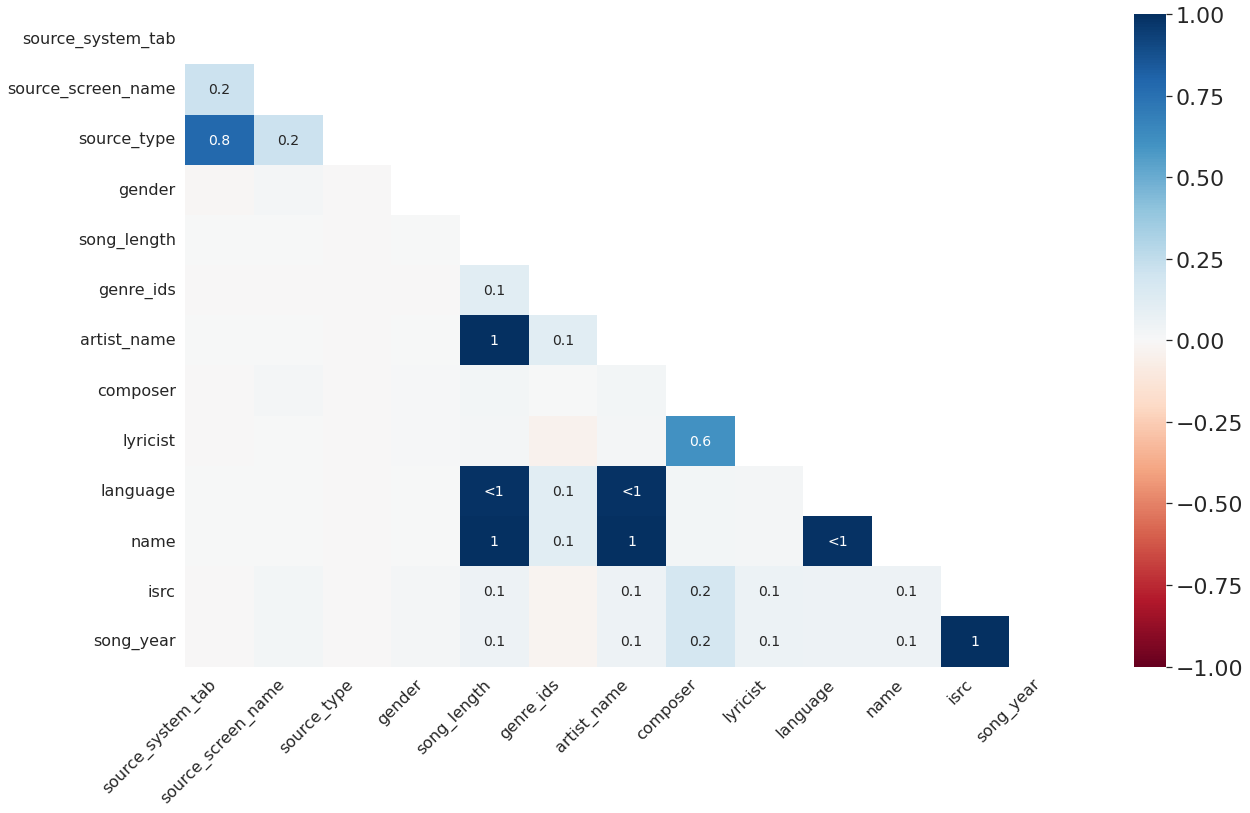

In [52]:
msno.heatmap(train_merged)

- From the above heatmap we can say that, song length is depends on artist and the language in which it is made.
- lyrist and composer are also corelated, like some composers have their biases on lyrist and vice versa.
- song_length is also correlated with artist, composer, lyrist, genre_id, language, name, song_year, isrc.

<AxesSubplot:>

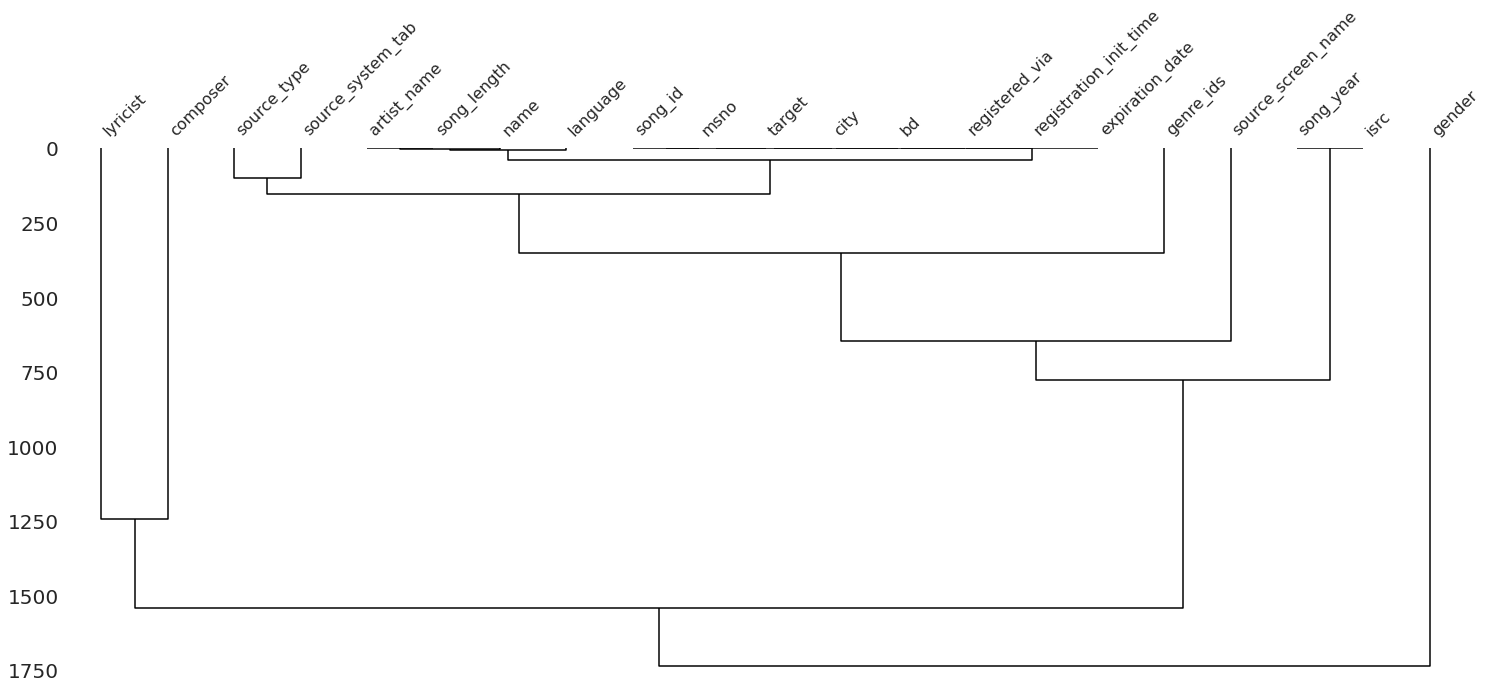

In [53]:
msno.dendrogram(train_merged)

- A strong nullity correlation here we can see:
- source_system_tab -> source_type
- composer -> lyricst
- lanugage -> song_length, artist_name, name
- isrc -> song_year

## Feature Engineering

- We have train, test, members, songs and songs_extra_info files.
- We will extract individual independent features from members, songs and songs_extra. 
- We will extract dependent features on train and val data after splitting to avoid data leakage problem.

In [54]:
del train, test, members, songs, song_extra_info

In [61]:
members = pd.read_csv(data_path + '/members.csv')
songs = pd.read_csv(data_path + '/songs.csv')
songs_extra = pd.read_csv(data_path + '/song_extra_info.csv')
train = pd.read_csv(data_path + '/train.csv')
test = pd.read_csv(data_path + '/test.csv')

### Splitting data

In [62]:
# As the data is oredered in chronological order so, we will take 80% train and 20% val data from train data
tr_index = train.shape[0] * 8 // 10

In [63]:
train_data = train.iloc[:tr_index]
val_data = train.iloc[tr_index:]
print(train_data.shape, val_data.shape, test.shape)

(5901934, 6) (1475484, 6) (2556790, 6)


### Merge data with members, songs and songs_extra

In [64]:
# merge with members
train_members = pd.merge(train_data, members, on='msno', how='left')
val_members = pd.merge(val_data, members, on='msno', how='left')
test_members = pd.merge(test, members, on='msno', how='left')

In [65]:
# merge songs and songs_extra
songs_all = pd.merge(songs, songs_extra, on='song_id', how='left')

In [66]:
# merge with members
train_all = pd.merge(train_members, songs_all, on='song_id', how='left')
val_all = pd.merge(val_members, songs_all, on='song_id', how='left')
test_all = pd.merge(test_members, songs_all, on='song_id', how='left')

In [67]:
del train_members
del val_members
del test_members
del songs_all
del train_data
del val_data
del train, test

### F.E. for Memebrs

- Members dataframe has registration and expiration dates, from which we can extract features like membership time, individual day, month and year.
- From analysis of 'bd' feature we noticed some oputliers like negetive and higher values of ages, which we can remove.

In [68]:
# Function to fix age value between 0 to 75.

def filter_age(x):
  # 98th percentile is 47

  if x >= 0 and x <= 75:
    return x
  else:
    return np.nan

train_all['bd'] = train_all['bd'].apply(filter_age)
val_all['bd'] = val_all['bd'].apply(filter_age)
test_all['bd'] = test_all['bd'].apply(filter_age)

- I have borrowed some ideas for F.E. from the kaggle kernel https://www.kaggle.com/asmitavikas/feature-engineered-0-68310

In [69]:
# Function to extract features like day, month, year from dates.

def extract_date_fatures(data):

  # convert into date format
  data['expiration_date'] = pd.to_datetime(data['expiration_date'], format='%Y%m%d')
  data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')
  
  # get membership period from registration and expiration dates
  data['membership_days'] = data['expiration_date'].subtract(data['registration_init_time']).dt.days.astype(int)

  # extract year, month and day from dates
  data['registration_year'] = data['registration_init_time'].dt.year
  data['registration_month'] = data['registration_init_time'].dt.month
  data['registration_day'] = data['registration_init_time'].dt.day

  data['expiration_year'] = data['expiration_date'].dt.year
  data['expiration_month'] = data['expiration_date'].dt.month
  data['expiration_day'] = data['expiration_date'].dt.day

  return data

train_all = extract_date_fatures(train_all)
val_all = extract_date_fatures(val_all)
test_all = extract_date_fatures(test_all)

### F.E for Songs

- We have seen that songs has 'lyricist' and 'composer' features which have more than 25% of missing values. So let's just ignore these two features for now and fill missing values in the remaining features.

In [70]:
train_all.tail(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,language,name,isrc,membership_days,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day
5901929,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,/r/F8SsC84+7/rg/BwlZnTlGzyCOX3Y8UdDkbY/0ZIA=,my library,Local playlist more,local-library,0,1,18.0,female,3,...,3.0,再見太難,TWI931000012,929,2015,3,21,2017,10,5
5901930,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,vMmYn3V5T7jv+EVVUBRbiUdO/wNDjCCio3CgaXMJ/eU=,my library,Local playlist more,local-library,1,1,18.0,female,3,...,3.0,你的承諾,NaN,929,2015,3,21,2017,10,5
5901931,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,b8Ec5KHbhiJc+Aeg4hgVx7mkdk5UlDZyW48Y1OfyqBU=,my library,Local playlist more,local-library,1,1,18.0,female,3,...,3.0,走在冷風中,TWF711100078,929,2015,3,21,2017,10,5
5901932,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,fwaxN4NL0q27tHQq4VEPCKVTywMIGqImrgRvFLnrVJw=,my library,Local playlist more,local-library,1,1,18.0,female,3,...,3.0,說好各走五十步,TWA531302103,929,2015,3,21,2017,10,5
5901933,+fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=,yqZjiUmLn/+h6g047I0LNxX3UoS60z3PJacJOFcxFMU=,my library,Local playlist more,local-library,0,1,18.0,female,3,...,52.0,I Was a Fool,USWB11203029,929,2015,3,21,2017,10,5


In [71]:
train_all.isnull().any()

msno                      False
song_id                   False
source_system_tab          True
source_screen_name         True
source_type                True
target                    False
city                      False
bd                         True
gender                     True
registered_via            False
registration_init_time    False
expiration_date           False
song_length                True
genre_ids                  True
artist_name                True
composer                   True
lyricist                   True
language                   True
name                       True
isrc                       True
membership_days           False
registration_year         False
registration_month        False
registration_day          False
expiration_year           False
expiration_month          False
expiration_day            False
dtype: bool

In [72]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901934 entries, 0 to 5901933
Data columns (total 27 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       object        
 3   source_screen_name      object        
 4   source_type             object        
 5   target                  int64         
 6   city                    int64         
 7   bd                      float64       
 8   gender                  object        
 9   registered_via          int64         
 10  registration_init_time  datetime64[ns]
 11  expiration_date         datetime64[ns]
 12  song_length             float64       
 13  genre_ids               object        
 14  artist_name             object        
 15  composer                object        
 16  lyricist                object        
 17  language                float64       
 18  na

In [73]:
# Filling missing values
def filling_missing_values(data):
  data['source_system_tab'].fillna('no_system_tab', inplace=True)
  data['source_screen_name'].fillna('no_screen_name', inplace=True)
  data['source_type'].fillna('np_source_type', inplace=True)
  data['bd'].fillna(0, inplace=True)
  data['gender'].fillna('gender_missing', inplace=True)
  data['song_length'].fillna(0, inplace=True)
  data['genre_ids'].fillna(0, inplace=True)
  data['lyricist'].fillna('no_lyricist', inplace=True)
  data['artist_name'].fillna('no_artist_name', inplace=True)
  data['composer'].fillna('no_composer', inplace=True)
  data['language'].fillna('no_language', inplace=True)
  data['name'].fillna('no_name', inplace=True)
  return data

train_all = filling_missing_values(train_all)
val_all = filling_missing_values(val_all)
test_all = filling_missing_values(test_all)

#### F.E. for Genre

- Some genre_ids have more than one values which are seperated by '|'.
- We can extract features from genre_ids like total_count of genres.
- We can also seperate genre_ids in-to individual columns. To achieve this we will consider more than 2 genre_ids_count.
- I have borrowed this F.E idea from first place soultion.
- https://github.com/lystdo/Codes-for-WSDM-CUP-Music-Rec-1st-place-solution/blob/master/input/training/script/id_process.py

In [74]:
# Function to sepearate each genre_id and count total number of genre_ids.

def generate_genre_ids(data):

  genre_ids_matrix = np.zeros((data.shape[0], 4))

  for i in range(data.shape[0]):
    ids = str(data['genre_ids'].values[i]).split('|')
    if len(ids) > 2:
        genre_ids_matrix[i, 0] = (ids[0])
        genre_ids_matrix[i, 1] = (ids[1])
        genre_ids_matrix[i, 2] = (ids[2])
    elif len(ids) > 1:
        genre_ids_matrix[i, 0] = (ids[0])
        genre_ids_matrix[i, 1] = (ids[1])
    elif len(ids) == 1:
        genre_ids_matrix[i, 0] = (ids[0])
    genre_ids_matrix[i, 3] = len(ids)

  data['first_genre_id'] = genre_ids_matrix[:, 0] # keeps first genre_id
  data['second_genre_id'] = genre_ids_matrix[:, 1] # keeps second genre_id
  data['third_genre_id'] = genre_ids_matrix[:, 2] # keeps third genre_id
  data['genre_ids_count'] = genre_ids_matrix[:, 3] # keeps count of genre_ids
  return data

In [75]:
train_all = generate_genre_ids(train_all)
val_all = generate_genre_ids(val_all)
test_all = generate_genre_ids(test_all)

- We will drop 'composer' and 'lyricist' as they contains higher missing values.


In [76]:
train_all = train_all.drop(['composer', 'lyricist'], axis=1)
val_all = val_all.drop(['composer', 'lyricist'], axis=1)
test_all = test_all.drop(['composer', 'lyricist'], axis=1)

In [77]:
#### F.E for Artist

- Some songs has 'feat' included in their artist names. We will add another column with boolean value based on 'feat' presents or not.
- If more than one artists are present in the song then their names are seperated by & and , 
- We will add extra features like is_featured, artist_count, first_artist_name.

In [78]:
# Function to check 'feat' in artist field.

def calculate_is_featured(data):
  data['is_featured'] = data['artist_name'].apply(lambda x: 1 if ' feat' in str(x) else 0).astype(np.int8)
  return data

In [79]:
train_all = calculate_is_featured(train_all)
val_all = calculate_is_featured(val_all)
test_all = calculate_is_featured(test_all)

In [80]:
# Function to count total number of artists for each song.

def artist_count(x):
  return x.count('and') + x.count(',') + x.count(' feat') + x.count('&') + 1

# Function to extract first artist name from more than one artists.

def get_first_artist(x):
  if x.count('and') > 0:
    x = x.split('and')[0]
  if x.count(',') > 0:
    x = x.split(',')[0]
  if x.count(' feat') > 0:
    x = x.split(' feat')[0]
  if x.count('&') > 0:
    x = x.split('&')[0]
  return x.strip()

In [81]:
# Function to execute above both functions.

def calculate_artist_features(data):

  # get artist count 
  data['artist_count'] = data['artist_name'].apply(artist_count).astype(np.int8)
  # get first artist name
  data['first_artist_name'] = data['artist_name'].apply(get_first_artist)
  return data

In [82]:
train_all = calculate_artist_features(train_all)
val_all = calculate_artist_features(val_all)
test_all = calculate_artist_features(test_all)

#### F.E. for Extra

- We will add boolean feature for songs, if song comes from '17' or '45' lanuage then we will set boolean feature.
- We will calculate mean length of song from train songs and will set the song's size as an extra boolean feature either smaller than mean or not. 

In [83]:
# Function to add language boolean feature.

def song_lang_boolean(x):
  if 17.0 == str(x) or 45.0 == str(x):
    return 1
  else:
    return 0
    
mean_song_length = np.mean(train_all['song_length'])

# Function to add song_size boolean feature.
def smaller_song(x):
  if x < mean_song_length:
    return 1
  else:
    return 0

In [84]:
def calculate_language_features(data):
  data['song_lang_boolean'] = data['language'].apply(song_lang_boolean).astype(np.int8)
  data['song_size_boolean'] = data['song_length'].apply(smaller_song).astype(np.int8)
  return data

In [85]:
train_all = calculate_language_features(train_all)
val_all = calculate_language_features(val_all)
test_all = calculate_language_features(test_all)

### F.E for songs_extra

- songs_extra file has feature like 'isrc' which is International Standard Recording Code. For each song its isrc is unique which contains information like countr_code, registraion_code, year of reference and designation code.
- https://isrc.ifpi.org/en/isrc-standard/code-syntax
- We can extract features like country_code, registration_code and song_year from 'isrc' feature.

In [86]:
# Function to extract features from isrc.

def calcualte_songs_features(data):

  isrc = data['isrc']
  data['country_code'] = isrc.str.slice(0, 2)
  data['registration_code'] = isrc.str.slice(2, 5)
  data['song_year'] = isrc.str.slice(5, 7).astype(float)
  data['song_year'] = data['song_year'].apply(lambda x: 2000+x if x < 18 else 1900+x)
  data['isrc_missing'] = (data['country_code'] == 0) * 1.0
  return data

In [87]:
train_all = calcualte_songs_features(train_all)
val_all = calcualte_songs_features(val_all)
test_all = calcualte_songs_features(test_all)

In [88]:
# Function to fill missing isrc values.

def filling_missing_isrc_values(data):
  data['isrc'].fillna('no_isrc', inplace=True)
  data['country_code'].fillna('no_country_code', inplace=True)
  data['registration_code'].fillna('no_registration_code', inplace=True)
  data['song_year'].fillna('no_song_year', inplace=True)
  return data

train_all = filling_missing_isrc_values(train_all)
val_all = filling_missing_isrc_values(val_all)
test_all = filling_missing_isrc_values(test_all)

In [89]:
val_all.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_length', 'genre_ids',
       'artist_name', 'language', 'name', 'isrc', 'membership_days',
       'registration_year', 'registration_month', 'registration_day',
       'expiration_year', 'expiration_month', 'expiration_day',
       'first_genre_id', 'second_genre_id', 'third_genre_id',
       'genre_ids_count', 'is_featured', 'artist_count', 'first_artist_name',
       'song_lang_boolean', 'song_size_boolean', 'country_code',
       'registration_code', 'song_year', 'isrc_missing'],
      dtype='object')

In [90]:
train_all = train_all.drop(['genre_ids', 'artist_name','isrc', 'registration_init_time', 'expiration_date'], axis=1)
val_all = val_all.drop(['genre_ids', 'artist_name' ,'isrc', 'registration_init_time', 'expiration_date'], axis=1)
test_all = test_all.drop(['genre_ids', 'artist_name','isrc', 'registration_init_time', 'expiration_date'], axis=1)

### Group by features

- As some users have preferences over their favourite songs, artists or language.
- Like indian people over 40 ages are fond of hindi soothing or bollywood classics rather than english pop or rock music.
- Using group by we can extract some features based on user's choices like song_count (for each song how many times he/she listens), artist_count (for each artist how many number of users or songs are present in our dataset.)
- We will extract theese types of group by features according to train, val and test data seperately to avoid data leakage issues.

In [91]:
# Function to calculate group by features on dataframe.

def calculate_groupby_features(data):
  
  # song count for each user
  member_song_count = data.groupby('msno').count()['song_id'].to_dict()
  data['member_song_count'] = data['msno'].apply(lambda x: member_song_count[x])

  # song count for each artist
  artist_song_count = data.groupby('first_artist_name').count()['song_id'].to_dict()
  data['artist_song_count'] = data['first_artist_name'].apply(lambda x: artist_song_count[x])

  # song count for each genre_id
  first_genre_id_song_count = data.groupby('first_genre_id').count()['song_id'].to_dict()
  data['genre_song_count'] = data['first_genre_id'].apply(lambda x: first_genre_id_song_count[x])

  # song count for each lanugage
  lang_song_count = data.groupby('language').count()['song_id'].to_dict()
  data['lang_song_count'] = data['language'].apply(lambda x: lang_song_count[x])

  # user count for each song
  song_member_count = data.groupby('song_id').count()['msno'].to_dict()
  data['song_member_count'] = data['song_id'].apply(lambda x: song_member_count[x])

  # We can add group by  wrt 'age'
  age_song_count = data.groupby('bd').count()['song_id'].to_dict()
  data['age_song_count'] = data['bd'].apply(lambda x: age_song_count[x])
 
  return data

In [92]:
train_all = calculate_groupby_features(train_all)
val_all = calculate_groupby_features(val_all)
test_all = calculate_groupby_features(test_all)

In [93]:
print(val_all, test_all)

                                                 msno  \
0        +fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=   
1        +fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=   
2        +fzJ5Uou/rxl1pXlebOEBHFKC4LBwDfgnc2R7287CVs=   
3        v04FgzXSdai5doJPrcwbrQTMbnETwLB5Li0t36X6kSQ=   
4        Rw5fS0aEzNBUaVMFQLpD2oW11xH2Jv107h49EUVXiTM=   
...                                               ...   
1475479  6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=   
1475480  ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=   
1475481  ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=   
1475482  0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=   
1475483  0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=   

                                              song_id source_system_tab  \
0        JTVy3aCLoTFkqPK4pkGBy0YTlH0zpkubCoKMh07WYfM=        my library   
1        2TR1fCpa5/ac/xe+hdOe52nBZ6afSU49gsGQbhTQVzk=        my library   
2        wev1Fi6KYkCSFAstQfhxJPZv7wkn8wGepys+KDmeBy4=        my library   
3        NhQfOV